C:\Users\Ganki\AppData\Local\Temp\ipykernel_29424\2280655334.py:29: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(loc["name"], font=font)
C:\Users\Ganki\AppData\Local\Temp\ipykernel_29424\2280655334.py:29: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(loc["name"], font=font)


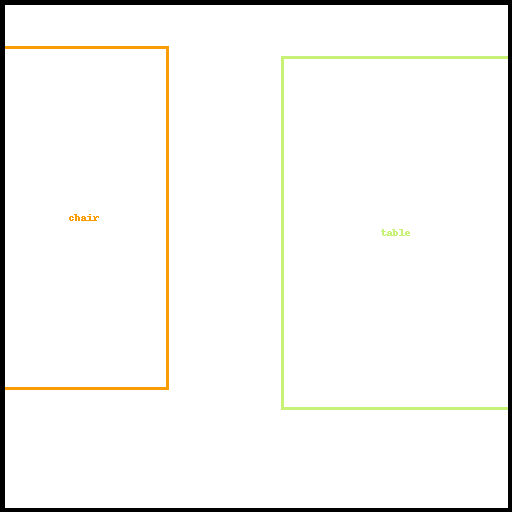

In [2]:
from PIL import Image, ImageDraw, ImageFont
import random

# 创建一个空白图像
image_width = 512
image_height = 512
image = Image.new("RGBA", (image_width, image_height), (255, 255, 255, 0))
draw = ImageDraw.Draw(image)

# 框的位置和属性
locations = [
    {"coords": [0.0, 0.09, 0.33, 0.76],  "name": "chair"},
    {"coords": [0.55, 0.11, 1.0, 0.8], "name": "table"}
]

# 绘制每个框
for loc in locations:
    colour = (random.randint(0, 255),random.randint(0, 255),random.randint(0, 255))
    left = loc["coords"][0] * image_width
    top = loc["coords"][1] * image_height
    right = loc["coords"][2] * image_width
    bottom = loc["coords"][3] * image_height
    draw.rectangle([left, top, right, bottom], outline=colour, width=3)
    
    # 添加框名称
    text_x = (left + right) / 2
    text_y = (top + bottom) / 2
    font = ImageFont.load_default()
    text_width, text_height = draw.textsize(loc["name"], font=font)
    draw.text((text_x - text_width / 2, text_y - text_height / 2), loc["name"], fill=colour, font=font)

# 在整个图像周围添加一个框
draw.rectangle([0, 0, image_width, image_height], outline="black", width=5)
    
image

In [1]:
import json
import random
with open('training_data.json', 'r') as f:
    all_image = json.load(f)

livingroom,sofa,windows,small table,bouquet,armchair,candles,painting,magazine,ottoman,plant,ceiling,pillow
['sofa', 'windows', 'windows', 'small table']
[[0.48828125, 0.484375, 0.86328125, 0.80859375], [0.5625, 0.10546875, 0.90625, 0.6484375], [0.0625, 0.140625, 0.48046875, 0.609375], [0.2734375, 0.73046875, 0.81640625, 0.99609375]]


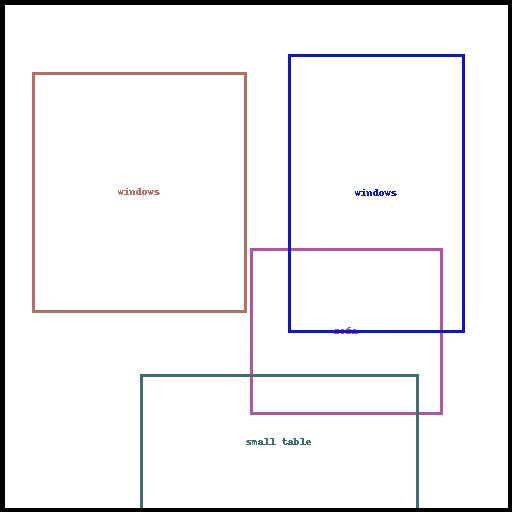

In [2]:
import base64
from io import BytesIO
from PIL import Image
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message="textsize is deprecated and will be removed in Pillow 10")


rn = random.randint(0, len(all_image)-1)
number_obj = random.randint(2, 6)


image_data = base64.b64decode(all_image[rn]["image"])
image = Image.open(BytesIO(image_data))
image.size
caption = all_image[rn]["caption"]




locations = []
for i in range(min(len(all_image[rn]["annos"]),number_obj)):
    if (len(locations) + len(all_image[rn]["annos"]) - i) < number_obj:
        print(i + number_obj)
        print(len(all_image[rn]["annos"]))
        if random.random() < 0.7:
            print(random.random())
            continue
    bbox = {}
    box = all_image[rn]["annos"][i]["bbox"]
    norm_box = [box[0]/image.size[0], box[1]/image.size[1], (box[2]+box[0])/image.size[0], (box[1]+box[3])/image.size[0]]
    token_pos = all_image[rn]["annos"][i]["tokens_positive"][0]
    obj = all_image[rn]["caption"][token_pos[0]:token_pos[1]]
    bbox["name"] = obj
    bbox["coords"] = norm_box
    locations.append(bbox)

    
    
print(caption)
print([c["name"] for c in locations])
print([c["coords"] for c in locations])

from PIL import Image, ImageDraw, ImageFont
import random

# 创建一个空白图像
image_width = 512
image_height = 512
image = Image.new("RGBA", (image_width, image_height), (255, 255, 255, 0))
draw = ImageDraw.Draw(image)

# 绘制每个框
for loc in locations:
    colour = (random.randint(0, 255),random.randint(0, 255),random.randint(0, 255))
    left = loc["coords"][0] * image_width
    top = loc["coords"][1] * image_height
    right = loc["coords"][2] * image_width
    bottom = loc["coords"][3] * image_height
    draw.rectangle([left, top, right, bottom], outline=colour, width=3)
    
    # 添加框名称
    text_x = (left + right) / 2
    text_y = (top + bottom) / 2
    font = ImageFont.load_default()
    text_width, text_height = draw.textsize(loc["name"], font=font)
    draw.text((text_x - text_width / 2, text_y - text_height / 2), loc["name"], fill=colour, font=font)

# 在整个图像周围添加一个框
draw.rectangle([0, 0, image_width, image_height], outline="black", width=5)
    
image
    